# Gradient Descent - Home Prices

# Preprocessing

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/1_linear_reg/homeprices.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


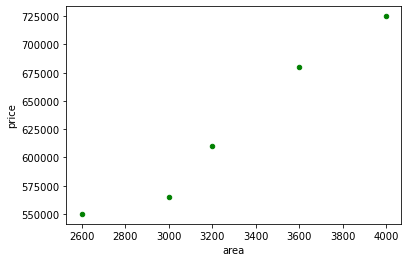

In [11]:
df.plot.scatter('area', 'price', color='green')
plt.show()

In [12]:
X_train = df.drop('price', axis=1)
y_train = df.drop('area', axis=1)

# Modelling

# Gradient Descent

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

# Gradient Descent

from sklearn.metrics import mean_squared_error

def gradient_descent(X, y, theta, lr=0.01, steps=100):
    N = len(y)
    cost_history = np.zeros(steps)
    theta_history = np.zeros((steps, 2))
    for i in range(steps):
        prediction = np.dot(X, theta)
        theta = theta - (1 / N) * lr * (X.T.dot((prediction - y)))
        theta_history[i, :] = theta.T
        cost_history[i] = mean_squared_error(prediction, y)
        
    return theta, cost_history, theta_history

In [15]:
lr = 0.1
it = 50
theta = np.random.randn(2, 1)

X_b = np.c_[
    X_train_scaled,
    np.ones((len(X_train_scaled), 1))
]

_, cost, theta = gradient_descent(X_b, y_train_scaled, theta, lr, it)


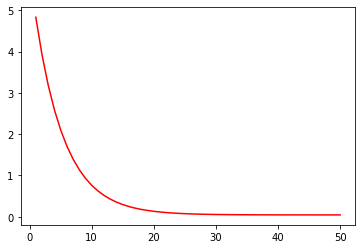

In [27]:
sns.lineplot(x=range(1, 51), y=cost,color='red')
plt.show()

In [21]:
np.array([1,2])

array([1, 2])

In [22]:
theta_df = pd.DataFrame(theta)

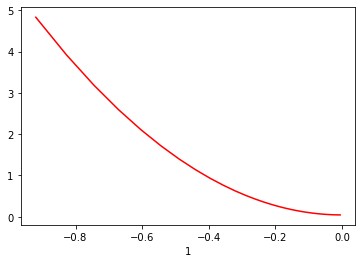

In [28]:
sns.lineplot(x=theta_df[1], y=cost, color='red')
plt.show()

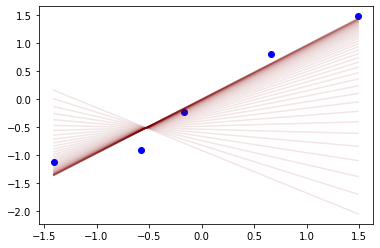

In [26]:
plt.scatter(X_train_scaled, y_train_scaled, color='blue')
for t in theta:
    plt.plot(
        X_train_scaled,
        t[0] * X_train_scaled + t[1],
        color='maroon',
        alpha=0.1
    )
plt.show()